# Generacion de datos de un sistema dinamico discreto

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

theta_1 = 1.0
theta_2 = 0.6
sigma2 = 0.05**2
N = 100

t = np.linspace(0.0,1,N)
y_true = theta_1 + theta_2*t
y = y_true + np.sqrt(sigma2)*np.random.randn(N)


# Estimacion por minimos cuadrados

theta: [1.01042991 0.58509546]


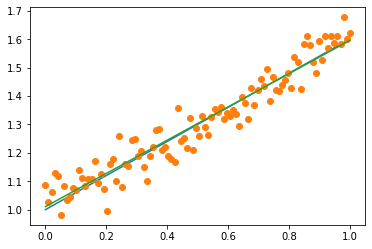

In [2]:
m_0 = np.array([0.5,0.2])
P_0 = np.eye(len(m_0))

H_t = np.zeros((N,2))

for i in range(0,N):
  H_t[i,:] = np.array([[1.,t[i]]])

Covm_t = np.linalg.inv(P_0) + 1/sigma2*np.dot(H_t.T,H_t) 
m_T = np.linalg.solve(Covm_t,1/sigma2*np.dot(H_t.T,y[0:N]) + np.linalg.solve(P_0,m_0))
y_est = m_T[0] + m_T[1]*t

print('theta:',m_T)

plt.figure()
plt.plot(t,y_true)
plt.plot(t,y,'o')
plt.plot(t,y_est)
plt.show()

In [3]:
Covm_t.shape

(2, 2)


# Estimacion usando el filtro de Kalman

[1.00699037 0.59032546]


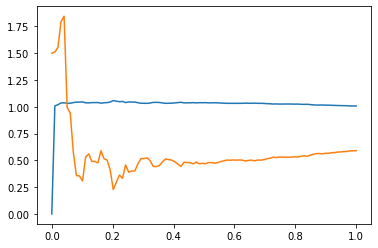

In [5]:
m_0 = np.array([0,1.5])
P_0 = np.eye(len(m_0))

mk = np.zeros((2,N))
mk1 = m_0
mk[:,0] = m_0
Pk1 = P_0

for i in range(1,N):
  Sk = np.dot(H_t[i,:],np.dot(Pk1,H_t[i,:])) + sigma2
  Kk = 1.0/Sk*np.dot(Pk1,H_t[i,:])
  #TODO Programar mk y Pk
  mk[:,i] =  
  Pk = 
  Pk1 = Pk

print(mk[:,-1])  

plt.figure()
plt.plot(t,mk[0,:])
plt.plot(t,mk[1,:])
plt.show()